In [73]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Read the CSV file
file_path = "E:\School\Triều\data.csv"  
data = pd.read_csv(file_path)

data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

<>:9: SyntaxWarning: invalid escape sequence '\S'
<>:9: SyntaxWarning: invalid escape sequence '\S'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_13492\1553431328.py:9: SyntaxWarning: invalid escape sequence '\S'
  file_path = "E:\School\Triều\data.csv"


In [74]:
# Step 2: Drop the 'IsHoliday' column and define independent (X) and dependent (y) variables
X = data.drop(columns=['Weekly_Sales', 'IsHoliday'])
y = data['Weekly_Sales']

In [75]:
# Step 3: Train/test split and train the XGBoost model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [76]:
# Step 4: Evaluate the model
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")

# Step 4: Get feature importance 
feature_importance = model.feature_importances_

# Create a DataFrame to associate importance with column names
coef_df = pd.DataFrame({
    'Variable': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Print the feature importance for each variable
print(coef_df)

RMSE: 4188.42
MAE: 2460.52
MAPE: 4326.87%
        Variable  Importance
2           Size    0.383175
1           Dept    0.342890
0          Store    0.123442
10           CPI    0.043286
11  Unemployment    0.027231
7      MarkDown3    0.018669
3    Temperature    0.018352
4     Fuel_Price    0.010544
8      MarkDown4    0.009432
6      MarkDown2    0.009288
9      MarkDown5    0.007333
5      MarkDown1    0.006358


In [77]:
# Step 5: Predict sales for Store 1 and Dept 1
store_1_dept_1 = data[(data['Store'] == 1) & (data['Dept'] == 1)]
X_store_dept = store_1_dept_1.drop(columns=['Weekly_Sales', 'IsHoliday'])

# Predict sales for Store 1 and Dept 1
store_dept_sales_pred = model.predict(X_store_dept)

# Actual sales for Store 1 and Dept 1
store_dept_sales_actual = store_1_dept_1['Weekly_Sales']

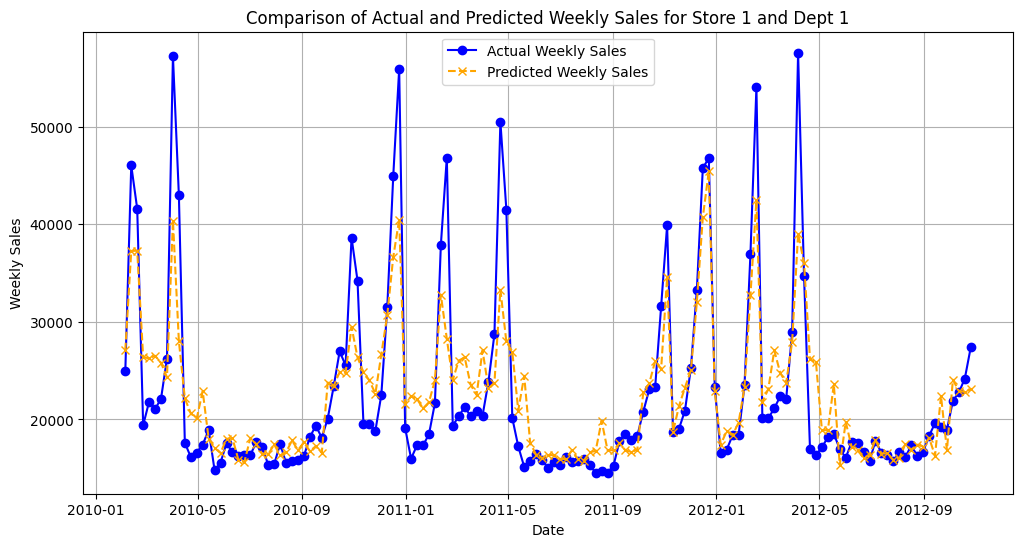

In [78]:
# Step 6: Plot actual vs predicted sales for Store 1 and Dept 1
plt.figure(figsize=(12, 6))
plt.plot(store_1_dept_1.index, store_dept_sales_actual, label='Actual Weekly Sales', color='blue', marker='o', linestyle='-')
plt.plot(store_1_dept_1.index, store_dept_sales_pred, label='Predicted Weekly Sales', color='orange', marker='x', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Comparison of Actual and Predicted Weekly Sales for Store 1 and Dept 1')
plt.legend()
plt.grid()
plt.show()

In [79]:
# Step 7: Predict next two weeks (assuming we know external factors for these weeks)
# Get the last date from the data
last_date = store_1_dept_1.index.max()

# Create a list of the next two weekly dates
next_two_weeks = pd.date_range(start=last_date, periods=3, freq='W')[1:]

# Create a new DataFrame with the features for the next two weeks
new_data = pd.DataFrame({
    'Store': [1, 1],
    'Dept': [1, 1],
    'Size': [store_1_dept_1['Size'].mean(), store_1_dept_1['Size'].mean()],  # Use the mean size for predictions
    'Temperature': [60.0, 58.0],  
    'Fuel_Price': [3.5, 3.6],     
    'MarkDown1': [0.0, 0.0],
    'MarkDown2': [0.0, 0.0],
    'MarkDown3': [0.0, 0.0],
    'MarkDown4': [0.0, 0.0],
    'MarkDown5': [0.0, 0.0],
    'CPI': [211.0, 211.0],
    'Unemployment': [8.0, 8.0]
}, index=next_two_weeks)

In [80]:
# Predict sales for the next two weeks
predicted_sales_next_2_weeks = model.predict(new_data)

# Add the predicted sales to the DataFrame
new_data['Predicted_Weekly_Sales'] = predicted_sales_next_2_weeks

# Print the predicted sales for the next two weeks
print("Predicted Weekly Sales for the next 2 weeks:")
print(new_data[['Predicted_Weekly_Sales']])

Predicted Weekly Sales for the next 2 weeks:
            Predicted_Weekly_Sales
2012-11-04            28513.335938
2012-11-11            29695.628906


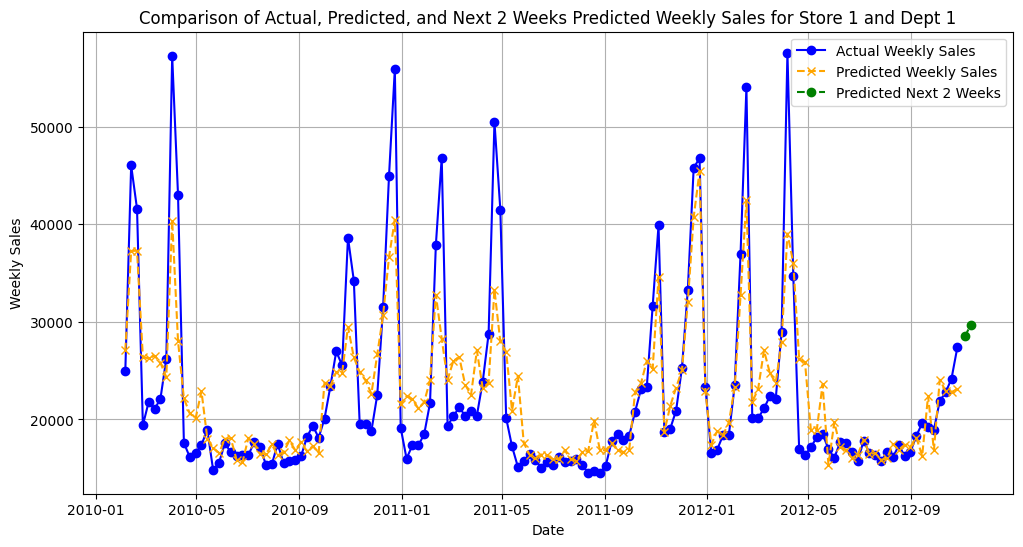

In [81]:
# Step 8: Plot predicted sales for the next two weeks
plt.figure(figsize=(12, 6))
plt.plot(store_1_dept_1.index, store_dept_sales_actual, label='Actual Weekly Sales', color='blue', marker='o', linestyle='-')
plt.plot(store_1_dept_1.index, store_dept_sales_pred, label='Predicted Weekly Sales', color='orange', marker='x', linestyle='--')
plt.plot(new_data.index, new_data['Predicted_Weekly_Sales'], label='Predicted Next 2 Weeks', color='green', marker='o', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Comparison of Actual, Predicted, and Next 2 Weeks Predicted Weekly Sales for Store 1 and Dept 1')
plt.legend()
plt.grid()
plt.show()

Predicted Weekly Sales for the next 10 weeks:
            Predicted_Weekly_Sales
2012-11-04            26768.445312
2012-11-11            29695.628906
2012-11-18            26677.396484
2012-11-25            27217.861328
2012-12-02            26885.242188
2012-12-09            29970.494141
2012-12-16            27638.333984
2012-12-23            26625.074219
2012-12-30            26625.074219
2013-01-06            23712.250000


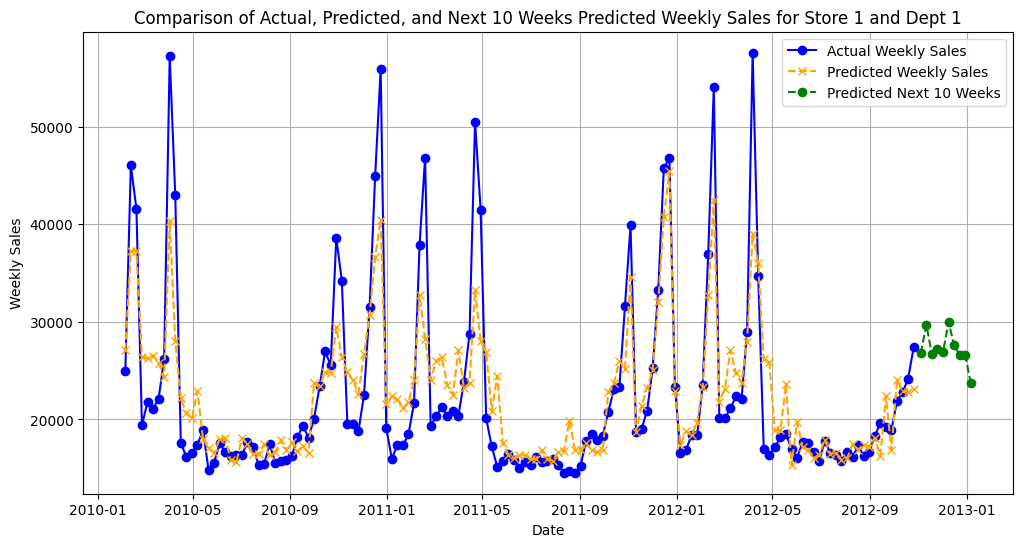

In [82]:
# Get the last date from the data
last_date = data.index.max()

# Create a list of the next 10 weekly dates
next_ten_weeks = pd.date_range(start=last_date, periods=11, freq='W')[1:]  # 11 periods to include the current week

# Function to generate temperature with some variation
def generate_temperature(base_temp, std_dev=2):
    return np.random.normal(loc=base_temp, scale=std_dev, size=10)  # Generate 10 values

# Create a list of temperatures with some variation
temperatures = generate_temperature(base_temp=60.0)

# Create a new DataFrame with the features for the next 10 weeks
new_data = pd.DataFrame({
    'Store': [1] * 10,
    'Dept': [1] * 10,
    'Size': [store_1_dept_1['Size'].mean()] * 10,
    'Temperature': temperatures,
    'Fuel_Price': [3.5 + i * 0.1 for i in range(10)],  # Increase fuel price slightly each week
    'MarkDown1': [0.0] * 10,
    'MarkDown2': [0.0] * 10,
    'MarkDown3': [0.0] * 10,
    'MarkDown4': [0.0] * 10,
    'MarkDown5': [0.0] * 10,
    'CPI': [211.0] * 10,
    'Unemployment': [8.0] * 10
}, index=next_ten_weeks)

# Predict sales for the next 10 weeks
predicted_sales_next_10_weeks = model.predict(new_data)

# Add the predicted sales to the DataFrame
new_data['Predicted_Weekly_Sales'] = predicted_sales_next_10_weeks

# Print the predicted sales for the next 10 weeks
print("Predicted Weekly Sales for the next 10 weeks:")
print(new_data[['Predicted_Weekly_Sales']])

# Step 8: Plot predicted sales for the next 10 weeks
plt.figure(figsize=(12, 6))
plt.plot(store_1_dept_1.index, store_dept_sales_actual, label='Actual Weekly Sales', color='blue', marker='o', linestyle='-')
plt.plot(store_1_dept_1.index, store_dept_sales_pred, label='Predicted Weekly Sales', color='orange', marker='x', linestyle='--')
plt.plot(new_data.index, new_data['Predicted_Weekly_Sales'], label='Predicted Next 10 Weeks', color='green', marker='o', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Comparison of Actual, Predicted, and Next 10 Weeks Predicted Weekly Sales for Store 1 and Dept 1')
plt.legend()
plt.grid()
plt.show()